In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the datetime module from the datetime library.
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

606

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | wahran
City not found. Skipping...
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | port elizabeth
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | seinajoki
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | mount gambier
Processing Record 9 of Set 1 | amderma
City not found. Skipping...
Processing Record 10 of Set 1 | lebu
Processing Record 11 of Set 1 | shajapur
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | shache
Processing Record 14 of Set 1 | jiaonan
Processing Record 15 of Set 1 | saiha
Processing Record 16 of Set 1 | port alfred
Processing Record 17 of Set 1 | talnakh
Processing Record 18 of Set 1 | yellowknife
Processing Record 19 of Set 1 | atuona
Processing Record 20 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 21 of Set 1 | hervey ba

Processing Record 37 of Set 4 | camacari
Processing Record 38 of Set 4 | ilulissat
Processing Record 39 of Set 4 | sayyan
Processing Record 40 of Set 4 | bakchar
Processing Record 41 of Set 4 | anyama
Processing Record 42 of Set 4 | tomatlan
Processing Record 43 of Set 4 | sitka
Processing Record 44 of Set 4 | kashan
Processing Record 45 of Set 4 | pacific grove
Processing Record 46 of Set 4 | hirado
Processing Record 47 of Set 4 | oyo
Processing Record 48 of Set 4 | bethel
Processing Record 49 of Set 4 | terra santa
Processing Record 50 of Set 4 | victoria
Processing Record 1 of Set 5 | thinadhoo
Processing Record 2 of Set 5 | lida
Processing Record 3 of Set 5 | uige
Processing Record 4 of Set 5 | kaitangata
Processing Record 5 of Set 5 | viedma
Processing Record 6 of Set 5 | fort nelson
Processing Record 7 of Set 5 | san rafael
Processing Record 8 of Set 5 | luderitz
Processing Record 9 of Set 5 | diamantino
Processing Record 10 of Set 5 | kulhudhuffushi
Processing Record 11 of Set 5

Processing Record 29 of Set 8 | sakakah
Processing Record 30 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 31 of Set 8 | khilok
Processing Record 32 of Set 8 | burgeo
Processing Record 33 of Set 8 | barentsburg
City not found. Skipping...
Processing Record 34 of Set 8 | the valley
Processing Record 35 of Set 8 | galbshtadt
Processing Record 36 of Set 8 | klaksvik
Processing Record 37 of Set 8 | zlotow
Processing Record 38 of Set 8 | avera
Processing Record 39 of Set 8 | samusu
City not found. Skipping...
Processing Record 40 of Set 8 | arman
Processing Record 41 of Set 8 | gashua
Processing Record 42 of Set 8 | bairiki
Processing Record 43 of Set 8 | ixtapa
Processing Record 44 of Set 8 | port hedland
Processing Record 45 of Set 8 | consett
Processing Record 46 of Set 8 | san policarpo
Processing Record 47 of Set 8 | nara
Processing Record 48 of Set 8 | villa bruzual
Processing Record 49 of Set 8 | mpraeso
Processing Record 50 of Set 8 | stabat
Processing Record 1 o

Processing Record 15 of Set 12 | leh
Processing Record 16 of Set 12 | kargil
Processing Record 17 of Set 12 | xam nua
Processing Record 18 of Set 12 | vao
Processing Record 19 of Set 12 | bubaque
Processing Record 20 of Set 12 | mombetsu
Processing Record 21 of Set 12 | tautira
Processing Record 22 of Set 12 | sal rei
Processing Record 23 of Set 12 | shibetsu
Processing Record 24 of Set 12 | balakhta
Processing Record 25 of Set 12 | oktyabrskoye
Processing Record 26 of Set 12 | berlevag
Processing Record 27 of Set 12 | tynda
Processing Record 28 of Set 12 | guilin
Processing Record 29 of Set 12 | ilhabela
Processing Record 30 of Set 12 | portree
Processing Record 31 of Set 12 | christchurch
Processing Record 32 of Set 12 | dondo
Processing Record 33 of Set 12 | muzhi
Processing Record 34 of Set 12 | kashary
Processing Record 35 of Set 12 | esil
Processing Record 36 of Set 12 | haibowan
City not found. Skipping...
Processing Record 37 of Set 12 | porto novo
Processing Record 38 of Set 1

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,80.62,52,2,1.99,US,2021-07-24 16:21:40
1,Port Elizabeth,-33.9180,25.5701,59.29,72,0,11.50,ZA,2021-07-24 16:21:40
2,Punta Arenas,-53.1500,-70.9167,41.02,81,75,17.27,CL,2021-07-24 16:19:31
3,Seinajoki,62.7945,22.8282,71.98,39,0,1.01,FI,2021-07-24 16:17:29
4,Busselton,-33.6500,115.3333,56.08,74,99,15.43,AU,2021-07-24 16:21:41
5,Mataura,-46.1927,168.8643,38.48,92,93,4.03,NZ,2021-07-24 16:21:41
6,Mount Gambier,-37.8333,140.7667,40.91,93,75,17.27,AU,2021-07-24 16:21:41
7,Lebu,-37.6167,-73.6500,51.82,74,21,9.22,CL,2021-07-24 16:21:42
8,Shajapur,23.4333,76.2667,76.05,95,100,10.51,IN,2021-07-24 16:21:42
9,Ushuaia,-54.8000,-68.3000,38.82,87,40,1.14,AR,2021-07-24 16:20:40


In [14]:
new_column_order = ["City", "Country", "Date","Lat", "Lng", "Max Temp", "Humidity","Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2021-07-24 16:21:40,42.6001,-73.9662,80.62,52,2,1.99
1,Port Elizabeth,ZA,2021-07-24 16:21:40,-33.9180,25.5701,59.29,72,0,11.50
2,Punta Arenas,CL,2021-07-24 16:19:31,-53.1500,-70.9167,41.02,81,75,17.27
3,Seinajoki,FI,2021-07-24 16:17:29,62.7945,22.8282,71.98,39,0,1.01
4,Busselton,AU,2021-07-24 16:21:41,-33.6500,115.3333,56.08,74,99,15.43
...,...,...,...,...,...,...,...,...,...
552,Tarakan,ID,2021-07-24 16:24:32,3.3000,117.6333,78.30,83,75,16.11
553,Lazo,RU,2021-07-24 16:24:32,43.3817,133.9014,72.23,95,2,2.17
554,Collie,AU,2021-07-24 16:24:32,-33.3667,116.1500,53.98,93,95,6.98
555,Taltal,CL,2021-07-24 16:24:33,-25.4000,-70.4833,60.48,67,38,5.59


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

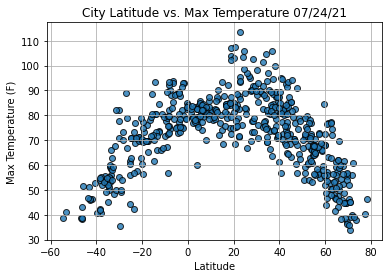

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

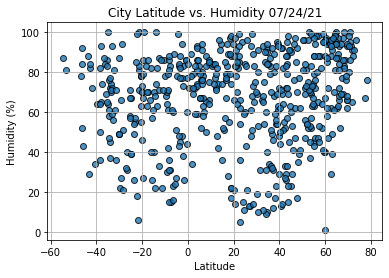

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

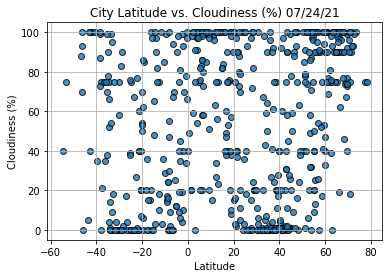

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()